In [1]:
import numpy as np
import pandas as pd
from osgeo import gdal, ogr, osr
import shapely
from shapely.geometry import Polygon, box, shape
import imageio
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Visualize Ghana label

Courtesy of Estes Lab

In [2]:
label_dir = '../data/parcels/ghana/3class/'
label_names = os.listdir(label_dir)

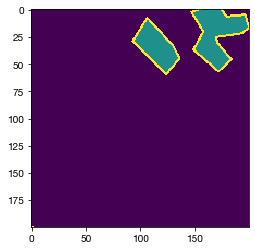

In [3]:
random_label = np.random.choice(label_names)

label_path = os.path.join(label_dir, random_label)
label = imageio.imread(label_path)

plt.imshow(label)
plt.show()

In [4]:
label.shape

(200, 200)

# Extract label latitude and longitude

In [5]:
# from Stack Exchange:
# https://gis.stackexchange.com/questions/57834/how-to-get-raster-corner-coordinates-using-python-gdal-bindings

def GetExtent(gt,cols,rows):
    ''' Return list of corner coordinates from a geotransform

        @type gt:   C{tuple/list}
        @param gt: geotransform
        @type cols:   C{int}
        @param cols: number of columns in the dataset
        @type rows:   C{int}
        @param rows: number of rows in the dataset
        @rtype:    C{[float,...,float]}
        @return:   coordinates of each corner
    '''
    ext = []
    xarr = [0, cols]
    yarr = [0, rows]

    for px in xarr:
        for py in yarr:
            x = gt[0]+(px*gt[1])+(py*gt[2])
            y = gt[3]+(px*gt[4])+(py*gt[5])
            ext.append([x,y])
            print(x,y)
        yarr.reverse()
    return ext

def ReprojectCoords(coords,src_srs,tgt_srs):
    ''' Reproject a list of x,y coordinates.

        @type geom:     C{tuple/list}
        @param geom:    List of [[x,y],...[x,y]] coordinates
        @type src_srs:  C{osr.SpatialReference}
        @param src_srs: OSR SpatialReference object
        @type tgt_srs:  C{osr.SpatialReference}
        @param tgt_srs: OSR SpatialReference object
        @rtype:         C{tuple/list}
        @return:        List of transformed [[x,y],...[x,y]] coordinates
    '''
    trans_coords = []
    transform = osr.CoordinateTransformation( src_srs, tgt_srs)
    for x,y in coords:
        x,y,z = transform.TransformPoint(x,y)
        trans_coords.append([x,y])
    return trans_coords

In [39]:
label_names = os.listdir(label_dir)
image_ids = []
min_lons, min_lats, max_lons, max_lats = [], [], [], []


for label_name in label_names:
    raster = os.path.join(label_dir, label_name)
    ds = gdal.Open(raster)

    gt = ds.GetGeoTransform()
    cols = ds.RasterXSize
    rows = ds.RasterYSize
    ext = GetExtent(gt,cols,rows)

    src_srs = osr.SpatialReference()
    src_srs.ImportFromWkt(ds.GetProjection())
    tgt_srs = osr.SpatialReference()
    tgt_srs.ImportFromEPSG(4326)
    tgt_srs = src_srs.CloneGeogCS()

    geo_ext = ReprojectCoords(ext, src_srs, tgt_srs)
    ext_array = np.array(geo_ext)
    min_lon, max_lon = ext_array[:,0].min(), ext_array[:,0].max()
    min_lat, max_lat = ext_array[:,1].min(), ext_array[:,1].max()
    image_id = label_name.split('.')[0]
    
    image_ids.append(image_id)
    min_lons.append(min_lon)
    min_lats.append(min_lat)
    max_lons.append(max_lon)
    max_lats.append(max_lat)

0.6589999999999999 6.1899999999999995
0.6589999999999999 6.185
0.6639999999999999 6.185
0.6639999999999999 6.1899999999999995
-2.4459999999999997 8.69
-2.4459999999999997 8.684999999999999
-2.441 8.684999999999999
-2.441 8.69
0.36899999999999994 9.934999999999999
0.36899999999999994 9.929999999999998
0.37399999999999994 9.929999999999998
0.37399999999999994 9.934999999999999
0.09400000000000003 9.889999999999999
0.09400000000000003 9.884999999999998
0.09900000000000003 9.884999999999998
0.09900000000000003 9.889999999999999
-2.7159999999999997 9.084999999999999
-2.7159999999999997 9.079999999999998
-2.711 9.079999999999998
-2.711 9.084999999999999
-1.826 8.99
-1.826 8.985
-1.8210000000000002 8.985
-1.8210000000000002 8.99
-2.081 9.184999999999999
-2.081 9.179999999999998
-2.076 9.179999999999998
-2.076 9.184999999999999
-1.501 10.285
-1.501 10.28
-1.496 10.28
-1.496 10.285
0.18400000000000005 6.395
0.18400000000000005 6.39
0.18900000000000006 6.39
0.18900000000000006 6.395
-0.375999999

0.07899999999999996 10.49
0.07899999999999996 10.485
0.08399999999999996 10.485
0.08399999999999996 10.49
0.2690000000000001 5.914999999999999
0.2690000000000001 5.909999999999999
0.2740000000000001 5.909999999999999
0.2740000000000001 5.914999999999999
-1.001 9.070000000000002
-1.001 9.065000000000001
-0.9959999999999999 9.065000000000001
-0.9959999999999999 9.070000000000002
-1.8210000000000002 8.665000000000001
-1.8210000000000002 8.66
-1.8160000000000003 8.66
-1.8160000000000003 8.665000000000001
-1.3409999999999997 8.85
-1.3409999999999997 8.844999999999999
-1.3359999999999999 8.844999999999999
-1.3359999999999999 8.85
-1.5959999999999996 8.855
-1.5959999999999996 8.85
-1.5909999999999997 8.85
-1.5909999999999997 8.855
-0.771 8.85
-0.771 8.844999999999999
-0.766 8.844999999999999
-0.766 8.85
-2.461 8.600000000000001
-2.461 8.595
-2.456 8.595
-2.456 8.600000000000001
-1.1810000000000003 9.139999999999999
-1.1810000000000003 9.134999999999998
-1.1760000000000004 9.134999999999998
-1

-2.471 10.780000000000001
-2.471 10.775
-2.466 10.775
-2.466 10.780000000000001
-1.1860000000000002 10.07
-1.1860000000000002 10.065
-1.1810000000000003 10.065
-1.1810000000000003 10.07
-0.956 8.559999999999999
-0.956 8.554999999999998
-0.951 8.554999999999998
-0.951 8.559999999999999
-2.776 9.555
-2.776 9.549999999999999
-2.771 9.549999999999999
-2.771 9.555
-1.2760000000000002 9.235
-1.2760000000000002 9.229999999999999
-1.2710000000000004 9.229999999999999
-1.2710000000000004 9.235
-1.0859999999999999 8.725000000000001
-1.0859999999999999 8.72
-1.081 8.72
-1.081 8.725000000000001
-1.1709999999999998 8.969999999999999
-1.1709999999999998 8.964999999999998
-1.166 8.964999999999998
-1.166 8.969999999999999
0.389 6.325
0.389 6.32
0.394 6.32
0.394 6.325
-0.5309999999999999 6.24
-0.5309999999999999 6.235
-0.5259999999999999 6.235
-0.5259999999999999 6.24
0.06899999999999995 10.475
0.06899999999999995 10.469999999999999
0.07399999999999995 10.469999999999999
0.07399999999999995 10.475
-1.3

-2.616 10.344999999999999
-2.616 10.35
-0.6160000000000001 8.67
-0.6160000000000001 8.665
-0.6110000000000001 8.665
-0.6110000000000001 8.67
-2.656 10.48
-2.656 10.475
-2.6510000000000002 10.475
-2.6510000000000002 10.48
-0.961 9.334999999999999
-0.961 9.329999999999998
-0.956 9.329999999999998
-0.956 9.334999999999999
1.1590000000000003 6.14
1.1590000000000003 6.135
1.1640000000000001 6.135
1.1640000000000001 6.14
-2.3609999999999998 8.835
-2.3609999999999998 8.83
-2.356 8.83
-2.356 8.835
-2.706 10.15
-2.706 10.145
-2.701 10.145
-2.701 10.15
-2.3209999999999997 9.135000000000002
-2.3209999999999997 9.13
-2.316 9.13
-2.316 9.135000000000002
-1.5310000000000001 9.110000000000001
-1.5310000000000001 9.105
-1.5260000000000002 9.105
-1.5260000000000002 9.110000000000001
-0.816 10.52
-0.816 10.514999999999999
-0.8109999999999999 10.514999999999999
-0.8109999999999999 10.52
-1.286 8.66
-1.286 8.655
-1.2810000000000001 8.655
-1.2810000000000001 8.66
-2.051 10.865
-2.051 10.86
-2.0460000000000

-0.5810000000000001 10.129999999999999
-0.5810000000000001 10.124999999999998
-0.5760000000000001 10.124999999999998
-0.5760000000000001 10.129999999999999
-0.5259999999999999 5.55
-0.5259999999999999 5.545
-0.5209999999999999 5.545
-0.5209999999999999 5.55
-1.2159999999999997 9.344999999999999
-1.2159999999999997 9.339999999999998
-1.2109999999999999 9.339999999999998
-1.2109999999999999 9.344999999999999
-0.15599999999999997 10.264999999999999
-0.15599999999999997 10.259999999999998
-0.15099999999999997 10.259999999999998
-0.15099999999999997 10.264999999999999
-0.976 10.2
-0.976 10.194999999999999
-0.971 10.194999999999999
-0.971 10.2
-0.07100000000000001 10.6
-0.07100000000000001 10.594999999999999
-0.066 10.594999999999999
-0.066 10.6
-1.3809999999999998 9.58
-1.3809999999999998 9.575
-1.376 9.575
-1.376 9.58
-0.25099999999999995 6.215
-0.25099999999999995 6.21
-0.24599999999999994 6.21
-0.24599999999999994 6.215
-0.22600000000000003 6.055000000000001
-0.22600000000000003 6.050000

-1.4259999999999997 9.520000000000001
-1.4259999999999997 9.515
-1.4209999999999998 9.515
-1.4209999999999998 9.520000000000001
-1.931 10.675
-1.931 10.67
-1.9260000000000002 10.67
-1.9260000000000002 10.675
-0.9660000000000001 9.1
-0.9660000000000001 9.094999999999999
-0.9610000000000001 9.094999999999999
-0.9610000000000001 9.1
0.6440000000000001 6.015000000000001
0.6440000000000001 6.010000000000001
0.6490000000000001 6.010000000000001
0.6490000000000001 6.015000000000001
0.7739999999999999 6.090000000000001
0.7739999999999999 6.085000000000001
0.7789999999999999 6.085000000000001
0.7789999999999999 6.090000000000001
-2.021 10.985
-2.021 10.979999999999999
-2.016 10.979999999999999
-2.016 10.985
0.729 6.17
0.729 6.165
0.734 6.165
0.734 6.17
-0.341 6.135000000000001
-0.341 6.130000000000001
-0.336 6.130000000000001
-0.336 6.135000000000001
-1.101 8.809999999999999
-1.101 8.804999999999998
-1.096 8.804999999999998
-1.096 8.809999999999999
-0.28600000000000003 9.625000000000002
-0.2860

In [40]:
ghana_bounding_boxes = pd.DataFrame({
    "image_id": image_ids,
    "min_lon": min_lons,
    "max_lon": max_lons,
    "min_lat": min_lats,
    "max_lat": max_lats
})

In [41]:
ghana_bounding_boxes.head()

,image_id,min_lon,max_lon,min_lat,max_lat
0,GH0641450_3640_6270,0.659,0.664,6.185,6.190
1,GH0285898_3019_5770,-2.446,-2.441,8.685,8.690
2,GH0130335_3582_5521,0.369,0.374,9.930,9.935
3,GH0135901_3527_5530,0.094,0.099,9.885,9.890
4,GH0236748_2965_5691,-2.716,-2.711,9.080,9.085


In [8]:
# ghana_bounding_boxes.to_csv('../data/planet/ghana/bbox_ghana_3class_600.csv', index=False)
ghana_bounding_boxes = pd.read_csv('../data/planet/ghana/bbox_ghana_3class_600.csv')

In [42]:
# expand images to beyond 200x200 px --> 256x256 px
ghana_bounding_boxes['max_lon'] = ghana_bounding_boxes['min_lon'] + \
    1./(111111. * np.cos(ghana_bounding_boxes['min_lat'] * np.pi / 180.)) * 500 * 3
ghana_bounding_boxes['max_lat'] = ghana_bounding_boxes['min_lat'] + 1./111111. * 500 * 3

ghana_bounding_boxes.to_csv('../data/planet/ghana/bbox_ghana_3class_600_256x256.csv', index=False)

In [44]:
ghana_bounding_boxes.head()

,image_id,min_lon,max_lon,min_lat,max_lat
0,GH0641450_3640_6270,0.659,0.672579,6.185,6.1985
1,GH0285898_3019_5770,-2.446,-2.432343,8.685,8.6985
2,GH0130335_3582_5521,0.369,0.382705,9.930,9.9435
3,GH0135901_3527_5530,0.094,0.107703,9.885,9.8985
4,GH0236748_2965_5691,-2.716,-2.702329,9.080,9.0935


In [53]:
ghana_bounding_boxes['image_id'].values

array(['GH0641450_3640_6270', 'GH0285898_3019_5770',
       'GH0130335_3582_5521', 'GH0135901_3527_5530',
       'GH0236748_2965_5691', 'GH0249061_3143_5710',
       'GH0223922_3092_5671', 'GH0085907_3208_5451',
       'GH0607395_3545_6229', 'GH0688051_3433_6326',
       'GH0039037_3031_5374', 'GH0656810_3687_6288',
       'GH0654161_3611_6285', 'GH0106058_3234_5483',
       'GH0122428_3168_5509', 'GH0249085_3167_5710',
       'GH0047540_3436_5388', 'GH0676897_3693_6312',
       'GH0648106_3565_6278', 'GH0670860_3438_6305',
       'GH0037613_3313_5371', 'GH0105957_3133_5483',
       'GH0618025_3622_6242', 'BF0786232_3364_5307',
       'GH0241640_3332_5698', 'GH0281951_3242_5763',
       'GH0188837_3364_5616', 'GH0222715_3180_5669',
       'GH0690655_3617_6329', 'GH0215818_3342_5658',
       'GH0145779_3480_5546', 'GH0001445_3488_5299',
       'GH0196427_3358_5628', 'GH0237163_3380_5691',
       'GH0641354_3544_6270', 'GH0032526_3354_5362',
       'GH0281768_3059_5763', 'GH0679921_3434_

# Overlaid on Planet images

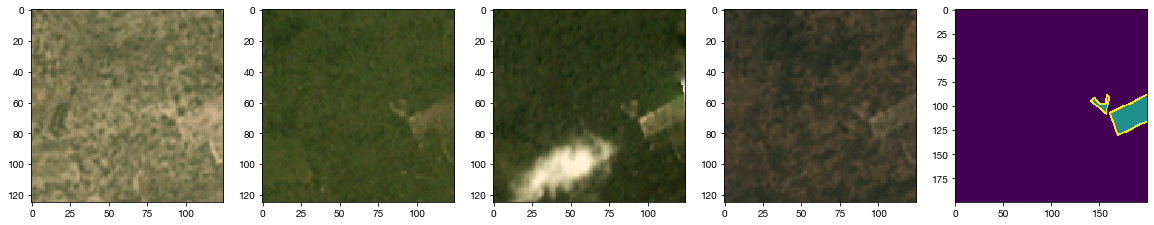

In [6]:
image_id = 'CI0229268_2950_5700'
# GH0227207_3141_5676
# BF0899439_2956_5543

label = imageio.imread('../data/parcels/ghana/3class/{}.tif'.format(image_id))
nrow, ncol = label.shape

months = ['05', '07', '09', '11']
fig, ax = plt.subplots(1, 1+len(months), figsize=(20,4))

for i, month in enumerate(months):
    img = imageio.imread(
        '../data/planet/ghana/monthly_mosaics_renamed_clipped_merged/{}_2018_{}.tif'.format(image_id, month))
    size = img.shape[1]
    ax[i].imshow(img[size-125:, :125])
    
ax[-1].imshow(label)

plt.show()

In [7]:
img.shape

(319, 319, 4)